In [100]:
%run team3_module.py
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'



In [11]:
import pandas as pd
import numpy as np
import os
from scipy import stats


# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youri','류현진출전일점유율.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)

# data.info()
data

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,ERA2
0,2024/03/23,토,LG,한화,잠실,23750.0,23750,1.000000,LG,선발,...,21.0,3 2/3,6.0,0.0,3.0,0.0,0.0,5.0,2.0,4.91
1,2024/03/24,일,LG,한화,잠실,23750.0,23750,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/03/26,화,SSG,한화,문학,10541.0,23000,0.458304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/03/27,수,SSG,한화,문학,11005.0,23000,0.478478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/03/28,목,SSG,한화,문학,11755.0,23000,0.511087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2024/08/14,수,한화,LG,대전,11884.0,12000,0.990333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2024/08/15,목,한화,LG,대전,12000.0,12000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2024/08/16,금,SSG,한화,문학,21057.0,23000,0.915522,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2024/08/17,토,SSG,한화,문학,23000.0,23000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
선발_data = data[data['구분'] == '선발']
선발_data

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,ERA2
0,2024/03/23,토,LG,한화,잠실,23750.0,23750,1.000000,LG,선발,...,21.0,3 2/3,6.0,0.0,3.0,0.0,0.0,5.0,2.0,4.91
5,2024/03/29,금,한화,KT,대전,12000.0,12000,1.000000,KT,선발,...,25.0,6,8.0,0.0,0.0,0.0,9.0,2.0,2.0,3.72
10,2024/04/05,금,키움,한화,고척,16000.0,16000,1.000000,키움,선발,...,23.0,4 1/3,9.0,0.0,2.0,0.0,2.0,9.0,9.0,8.36
15,2024/04/11,목,두산,한화,잠실,22157.0,23750,0.932926,두산,선발,...,22.0,6,1.0,0.0,2.0,0.0,8.0,0.0,0.0,5.85
20,2024/04/17,수,NC,한화,창원,9921.0,17891,0.554525,NC,선발,...,25.0,7,3.0,1.0,2.0,0.0,8.0,3.0,3.0,5.33
25,2024/04/24,수,KT,한화,수원,12538.0,18700,0.670481,KT,선발,...,25.0,5,7.0,0.0,2.0,0.0,4.0,7.0,5.0,5.91
30,2024/04/30,화,한화,SSG,대전,12000.0,12000,1.000000,SSG,선발,...,26.0,6,7.0,0.0,2.0,0.0,1.0,2.0,1.0,5.21
35,2024/05/08,수,롯데,한화,사직,11407.0,22758,0.501230,롯데,선발,...,23.0,5,8.0,0.0,0.0,0.0,7.0,5.0,5.0,5.65
40,2024/05/14,화,한화,NC,대전,12000.0,12000,1.000000,NC,선발,...,28.0,6,8.0,0.0,1.0,1.0,8.0,2.0,2.0,5.33
45,2024/05/19,일,삼성,한화,대구,24000.0,24000,1.000000,삼성,선발,...,18.0,5,3.0,0.0,1.0,0.0,4.0,0.0,0.0,4.83


In [3]:
비선발_data = data[data['구분'] != '선발']
비선발_data

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,ERA2
1,2024/03/24,일,LG,한화,잠실,23750.0,23750,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/03/26,화,SSG,한화,문학,10541.0,23000,0.458304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/03/27,수,SSG,한화,문학,11005.0,23000,0.478478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/03/28,목,SSG,한화,문학,11755.0,23000,0.511087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024/03/30,토,한화,KT,대전,12000.0,12000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024/08/11,일,한화,키움,대전,12000.0,12000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2024/08/14,수,한화,LG,대전,11884.0,12000,0.990333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2024/08/15,목,한화,LG,대전,12000.0,12000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2024/08/16,금,SSG,한화,문학,21057.0,23000,0.915522,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
non_selected_columns = 비선발_data.iloc[:, 0:10]  # 0번 열부터 9번 열까지 선택

# 결과를 새로운 CSV 파일로 저장 (선택 사항)
non_selected_columns.to_csv('non_selected_columns.csv', index=False)

# 결과 출력 (선택 사항)
print(non_selected_columns)

             날짜 요일    홈  방문 구장_x      관중수    좌석수       점유율   상대   구분
1    2024/03/24  일   LG  한화   잠실  23750.0  23750  1.000000  NaN  NaN
2    2024/03/26  화  SSG  한화   문학  10541.0  23000  0.458304  NaN  NaN
3    2024/03/27  수  SSG  한화   문학  11005.0  23000  0.478478  NaN  NaN
4    2024/03/28  목  SSG  한화   문학  11755.0  23000  0.511087  NaN  NaN
6    2024/03/30  토   한화  KT   대전  12000.0  12000  1.000000  NaN  NaN
..          ... ..  ...  ..  ...      ...    ...       ...  ...  ...
106  2024/08/11  일   한화  키움   대전  12000.0  12000  1.000000  NaN  NaN
108  2024/08/14  수   한화  LG   대전  11884.0  12000  0.990333  NaN  NaN
109  2024/08/15  목   한화  LG   대전  12000.0  12000  1.000000  NaN  NaN
110  2024/08/16  금  SSG  한화   문학  21057.0  23000  0.915522  NaN  NaN
111  2024/08/17  토  SSG  한화   문학  23000.0  23000  1.000000  NaN  NaN

[89 rows x 10 columns]


In [7]:
# 0번 열부터 9번 열까지 선택하여 새로운 DataFrame 생성
selected_columns = 선발_data.iloc[:, 0:10]  # 0번 열부터 9번 열까지 선택

# 결과를 새로운 CSV 파일로 저장 (선택 사항)
selected_columns.to_csv('selected_columns.csv', index=False)

# 결과 출력 (선택 사항)
print(selected_columns)

PermissionError: [Errno 13] Permission denied: 'selected_columns.csv'

In [8]:
non_selected_data = pd.read_csv('non_selected_columns.csv')
non_selected_data.head()

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분
0,2024/03/24,일,LG,한화,잠실,23750.0,23750,1.000000,NaN,NaN
1,2024/03/26,화,SSG,한화,문학,10541.0,23000,0.458304,NaN,NaN
2,2024/03/27,수,SSG,한화,문학,11005.0,23000,0.478478,NaN,NaN
3,2024/03/28,목,SSG,한화,문학,11755.0,23000,0.511087,NaN,NaN
4,2024/03/30,토,한화,KT,대전,12000.0,12000,1.000000,NaN,NaN


In [9]:
selected_data = pd.read_csv('selected_columns.csv')
selected_data.head()

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분
0,2024/03/23,토,LG,한화,잠실,23750.0,23750,1.000000,LG,선발
1,2024/03/29,금,한화,KT,대전,12000.0,12000,1.000000,KT,선발
2,2024/04/05,금,키움,한화,고척,16000.0,16000,1.000000,키움,선발
3,2024/04/11,목,두산,한화,잠실,22157.0,23750,0.932926,두산,선발
4,2024/04/17,수,NC,한화,창원,9921.0,17891,0.554525,NC,선발


In [12]:
t, pvalue = stats.ttest_ind(selected_data['관중수'], non_selected_data['관중수'])
t, pvalue

(np.float64(1.5471277138873378), np.float64(0.12467889041425269))

In [13]:
import matplotlib.pyplot as plt

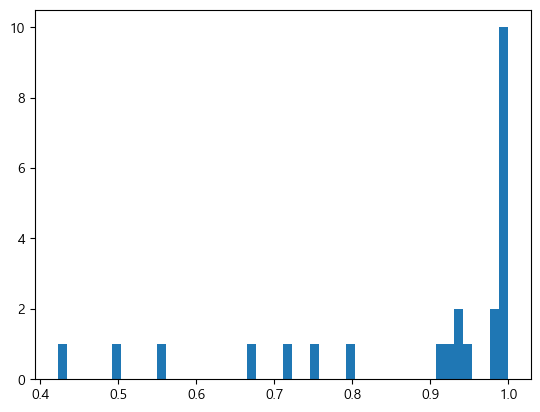

In [35]:
plt.hist(selected_data['점유율'], bins=50)
plt.yscale('linear')
plt.show()

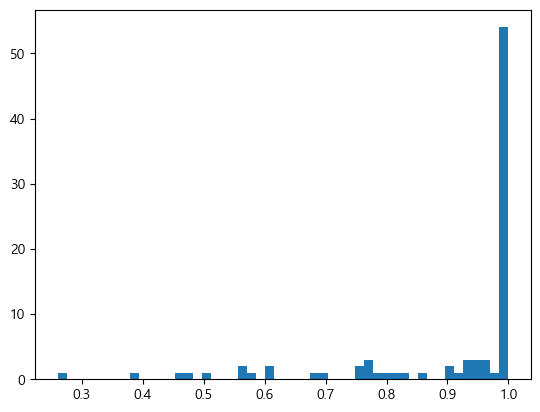

In [36]:
plt.hist(non_selected_data['점유율'], bins=50)
plt.yscale('linear')
plt.show()

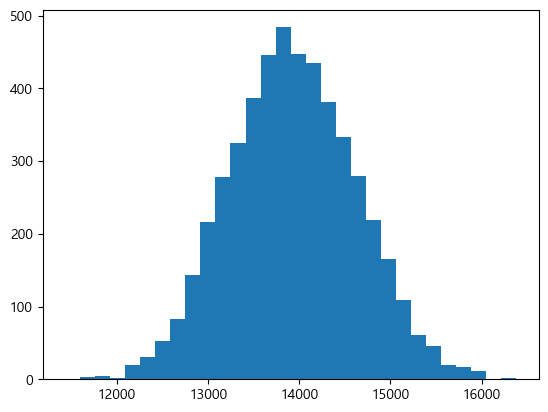

In [69]:
sample_means = []
for _ in range(5000):
    m = non_selected_data['관중수'].sample(30).mean()
    sample_means.append(m)

plt.hist(sample_means, bins=30)
plt.show()

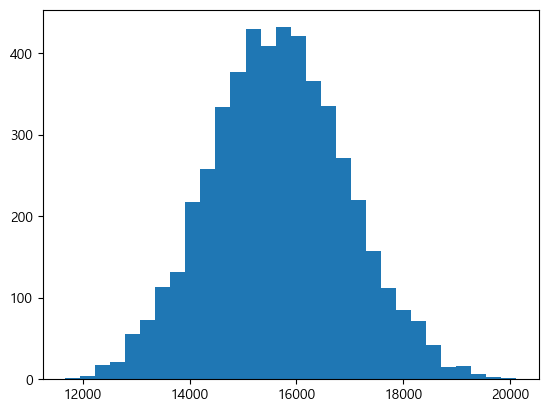

In [70]:
sample_means = []
for _ in range(5000):
    m = selected_data['관중수'].sample(10).mean()
    sample_means.append(m)

plt.hist(sample_means, bins=30)
plt.show()

In [ ]:
np.mean(sample_means)

In [ ]:
np.std(sample_means)

In [ ]:
len(selected_data)

In [18]:
rate_mean = np.mean(selected_data['점유율'])
rate_mean

np.float64(0.8753292547789883)

In [60]:
selected_data['관중수'].mean()

np.float64(15670.375)

In [61]:
non_selected_data['관중수'].mean()

np.float64(13938.280898876405)

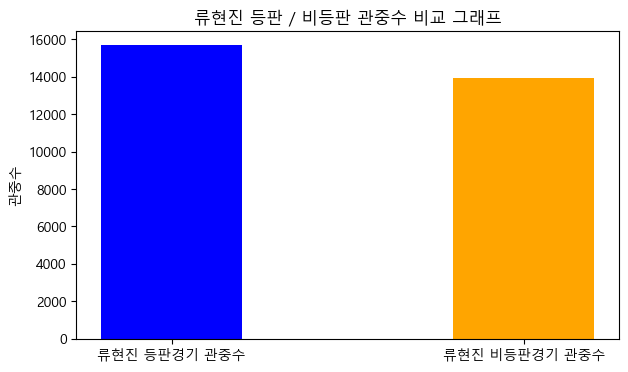

In [68]:
import matplotlib.pyplot as plt

# selected_data와 non_selected_data의 점유율 평균 계산
selected_mean = selected_data['관중수'].mean()
non_selected_mean = non_selected_data['관중수'].mean()

# 평균 값을 리스트로 저장
means = [selected_mean, non_selected_mean]
labels = ['류현진 등판경기 관중수', '류현진 비등판경기 관중수']


# 막대그래프 그리기
plt.figure(figsize=(7, 4))
plt.bar(labels, means, color=['blue', 'orange'], width=0.4)

# 그래프 제목 및 축 레이블 설정
plt.title('류현진 등판 / 비등판 관중수 비교 그래프')
plt.ylabel('관중수')
plt.yscale('linear')
# 그래프 보여주기
plt.show()


In [ ]:
관중수_평균 = 선발_data['관중수'].mean()
관중수_평균

In [ ]:
비선발관중수_평균 = 비선발_data['관중수'].mean()
비선발관중수_평균

In [ ]:
선발_se = np.std(선발_data['점유율']) / np.sqrt(len(선발_data))
선발_se

In [ ]:
(관중수_평균 - 비선발관중수_평균) / np.sqrt(선발_se**2 + 비선발_se**2)

In [ ]:
from scipy import stats

stats.norm.cdf(43621.9)

In [71]:
t, pvalue = stats.ttest_ind(선발_data['관중수'], 비선발_data['관중수'])
t, pvalue

(np.float64(1.5471277138873378), np.float64(0.12467889041425269))

In [74]:
import numpy as np
from scipy.stats import permutation_test

# 두 그룹의 데이터를 준비합니다.
group1 = 선발_data['관중수']
group2 = 비선발_data['관중수']

# 순열 검정을 수행합니다.
def difference_of_means(group1, group2):
    return np.mean(group1) - np.mean(group2)

# permutation_test 함수를 사용하여 순열 검정을 수행합니다.
result = permutation_test((group1, group2), difference_of_means,
                          n_resamples=50000, alternative='two-sided')

# 결과 출력
print("순열 검정 통계량:", result.statistic)
print("p-값:", result.pvalue)


순열 검정 통계량: 1732.0941011235955
p-값: 0.13191736165276693


In [76]:
import numpy as np

선발_se = np.std(선발_data['관중수']) / np.sqrt(len(선발_data))

비선발_se = np.std(비선발_data['관중수']) / np.sqrt(len(비선발_data))

print(f"'한화' 류현진 선발등판 경기의 관중수 표준편차: {선발_se}")
print(f"'한화' 그 외 경기의 관중수 표준편차: {비선발_se}")

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(선발_data['관중수'], 비선발_data['관중수'], equal_var=False)

print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. 류현진 선발등판 경기와 아닌 경기의 관중수 표준편차 간의 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 류현진 선발등판 경기와 아닌 경기의 관중수 표준편차 간의 평균에 유의미한 차이가 없습니다.")

'한화' 류현진 선발등판 경기의 관중수 표준편차: 1048.4203922060096
'한화' 그 외 경기의 관중수 표준편차: 502.07902495702433
t-검정 통계량: 1.462881879498168
p-값: 0.15270393105347352
귀무가설을 기각할 수 없습니다. 류현진 선발등판 경기와 아닌 경기의 관중수 표준편차 간의 평균에 유의미한 차이가 없습니다.


In [79]:
from scipy import stats
home_column = '한화'
home_crowd = data[data['홈'] == home_column]['관중수']

# '한화' 팀의 방문 관중 데이터를 필터링
visit_column = '한화'
visit_crowd = data[data['방문'] == visit_column]['관중수']

# 홈과 방문 관중의 표준편차 계산
home_std_dev = home_crowd.std()
visit_std_dev = visit_crowd.std()

print(f"'한화' 팀 홈 관중의 표준편차: {home_std_dev}")
print(f"'한화' 팀 방문 관중의 표준편차: {visit_std_dev}")

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(home_crowd, visit_crowd, equal_var=False)

print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. '한화' 팀의 홈 관중과 방문 관중 간의 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. '한화' 팀의 홈 관중과 방문 관중 간의 평균에 유의미한 차이가 없습니다.")

'한화' 팀 홈 관중의 표준편차: 1192.6306927163325
'한화' 팀 방문 관중의 표준편차: 5363.310029760219
t-검정 통계량: -8.33296043458039
p-값: 2.0450575222173074e-11
귀무가설을 기각합니다. '한화' 팀의 홈 관중과 방문 관중 간의 평균에 유의미한 차이가 있습니다.


In [80]:
from scipy import stats
home_column = '한화'
home_crowd = data[data['홈'] == home_column]['점유율']

# '한화' 팀의 방문 관중 데이터를 필터링
visit_column = '한화'
visit_crowd = data[data['방문'] == visit_column]['점유율']

# 홈과 방문 관중의 표준편차 계산
home_std_dev = home_crowd.std()
visit_std_dev = visit_crowd.std()

print(f"'한화' 팀 홈 관중의 점유율 표준편차: {home_std_dev}")
print(f"'한화' 팀 방문 관중의 점유율 표준편차: {visit_std_dev}")

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(home_crowd, visit_crowd, equal_var=False)

print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05  # 유의 수준
if p_value < alpha:
    print("귀무가설을 기각합니다. '한화' 팀의 홈 관중과 방문 관중 점유율 간의 평균에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. '한화' 팀의 홈 관중과 방문 관중 점유율 간의 평균에 유의미한 차이가 없습니다.")

'한화' 팀 홈 관중의 점유율 표준편차: 0.08880789415864607
'한화' 팀 방문 관중의 점유율 표준편차: 0.20934237321609617
t-검정 통계량: 4.221187846122559
p-값: 7.34321921209705e-05
귀무가설을 기각합니다. '한화' 팀의 홈 관중과 방문 관중 점유율 간의 평균에 유의미한 차이가 있습니다.


In [87]:
df = pd.read_csv('2024_일자별순위.csv')
df.head()

,일자,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,2024.03.23,1,LG,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
1,2024.03.23,1,SSG,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
2,2024.03.23,1,NC,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
3,2024.03.23,1,KIA,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
4,2024.03.23,1,삼성,1,1,0,0,1.0,0.0,1승0무0패,1승,0-0-0,1-0-0


C:\Users\medici\AppData\Local\Temp\ipykernel_12180\3404197805.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()  # 레이아웃 조정


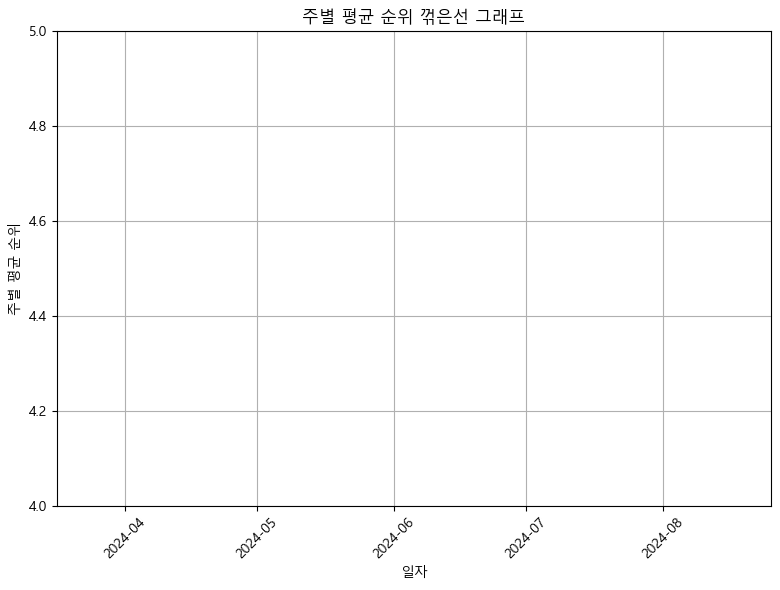

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('2024_일자별순위.csv')

# '일자' 열을 날짜 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'])

# '일자'를 인덱스로 설정
df.set_index('일자', inplace=True)

# 순위를 부호 반전 (1위가 높게 표현되도록)
df['순위'] = -df['순위']

# 주별로 '순위'의 평균 계산
weekly_ranking = df['순위'].resample('W').mean()

# 순위를 원래대로 복원 (부호를 다시 반전)
# weekly_ranking = -weekly_ranking

# 꺾은선 그래프 그리기
plt.figure(figsize=(8, 6))  # 그래프의 크기 설정
plt.plot(weekly_ranking.index, weekly_ranking, marker='o', linestyle='-', color='b')  # 꺾은선 그래프
plt.xlabel('일자')  # X축 레이블
plt.ylabel('주별 평균 순위')  # Y축 레이블
plt.title('주별 평균 순위 꺾은선 그래프')  # 그래프 제목
plt.xticks(rotation=45)  # X축 레이블 회전 (긴 레이블을 보기 좋게 함)
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
# 그래프 출력
plt.show()


In [85]:
from scipy.stats import pointbiserialr

# 류현진 등판 여부를 0과 1로 코딩 (1: 선발, 0: 비선발)
data['류현진_등판여부'] = np.where(data['구분'] == '선발', 1, 0)

# 점-이진 상관계수 계산
correlation, p_value = pointbiserialr(data['류현진_등판여부'], data['점유율'])

print(f"점-이진 상관계수: {correlation}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("류현진의 선발 등판 여부와 점유율 사이의 상관관계가 통계적으로 유의미합니다.")
else:
    print("류현진의 선발 등판 여부와 점유율 사이의 상관관계가 통계적으로 유의미하지 않습니다.")


점-이진 상관계수: -0.07049435927431148
p-value: 0.4581133132258278
류현진의 선발 등판 여부와 점유율 사이의 상관관계가 통계적으로 유의미하지 않습니다.


In [ ]:
data['점유율'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# '구분'이 '선발'인 데이터와 아닌 데이터 분리
선발_data = data[data['구분'] == '선발']
비선발_data = data[data['구분'] != '선발']

# 그래프 그리기
plt.figure(figsize=(12, 6))

# '구분'이 '선발'인 날의 꺾은선 그래프
plt.plot(선발_data['날짜'], 선발_data['점유율'], 'o-', color='blue', label='선발')

# '구분'이 '선발'이 아닌 날의 꺾은선 그래프
plt.plot(비선발_data['날짜'], 비선발_data['점유율'], 's-', color='red', label='비선발')

# 그래프 제목 및 레이블 설정
plt.title('점유율 비교: 선발 vs 비선발')
plt.xlabel('날짜')
plt.ylabel('점유율')
plt.legend()

# x축 날짜 포맷팅 (예: YYYY-MM-DD 형식)
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임을 여기에 로드합니다.
# 예: data = pd.read_csv('your_file.csv')

# 날짜 열을 datetime 형식으로 변환합니다.
data['날짜'] = pd.to_datetime(data['날짜'])

# '구분'이 '선발'인 데이터와 '선발'이 아닌 데이터 분리
선발_data = data[data['구분'] == '선발']
비선발_data = data[data['구분'] != '선발']

# 월별 평균 계산
# '날짜'를 인덱스로 설정 후 월별로 그룹화하여 평균 계산
선발_data.set_index('날짜', inplace=True)
# 비선발_data.set_index('날짜', inplace=True)

avg_선발 = 관중수_평균['관중수'].resample('M').mean()
monthly_avg_비선발 = 비선발_data['점유율'].resample('M').mean()

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))

# '구분'이 '선발'인 데이터의 막대 그래프
plt.bar(avg_선발.index, avg_선발, width=20, color='blue', label='선발', align='center')

# # '구분'이 '선발'이 아닌 데이터의 막대 그래프
# plt.bar(monthly_avg_비선발.index, monthly_avg_비선발, width=10, color='red', label='비선발', align='edge')

# 그래프 제목 및 레이블 설정
plt.title('월별 점유율 평균 비교 (막대그래프)')
plt.xlabel('날짜')
plt.ylabel('점유율')
plt.legend()

# x축 날짜 포맷팅
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# 그래프 보여주기
plt.show()



In [ ]:
비선발_dates = data[data['구분'] != '선발']['날짜']
비선발_dates

In [ ]:
선발_dates = data[data['구분'] == '선발']['날짜']
선발_dates

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(비선발_data['점유율'], bins=10)
plt.show

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(선발_data['점유율'], bins=10, color = 'red')
plt.show